# What to do? 
Perform Topic modeling on a social media corpus like Twitter or Reddit by using any python library.

# A gist of what i did...
1. Import the necessary libraries.
2. Read the dataset.
3. Used functions like info(), shape, describe(), unique() to know more about the dataframe.
4. The dataframe contains redundant tweets as well. This implies that our dataframe contains retweets.
5. So, next we add a separate column for retweets.
6. Used sum() on this column to find out that there are 773 retweets.
7. Using group by found out 10 most repeating tweets.
8. Plotted histogram of tweet counts.
9. Made new columns for retweeted usernames, mentioned usernames and hashtags.
10. Made a new dataframe hashtags_list_df which contains the rows from the hashtag columns where there are actually hashtags.
11. Created a dataframe flattened_hashtags_df  where each use of hashtag gets its own row.
12. Made a new dataframe popular_hashtags which stores the count of appearances of each hashtag.
13. Plotted these popular hashtags using barplot.
14. Repeated similar steps (10 - 13) for mentioned usernames and retweeted usernames.
15. Made a new dataframe which checks columns to encode presence of hashtags.
16. Calculated the correlation matrix and plotted it using heatmap.
17. Defined a function to clean_tweet to clean the tweets from punctuations, usernames etc. and added a new column in the dataframe with the same name.
18. Used count vectorizer to transform text to vector form.
19. Used LDA model on the counter vectorized dataframe.
20. Made a function display_topics which displays the topic words and the corresponding word weights.
21. Used NMF model on the counter vectorized dataframe.
22. Used function display_topics to display the table.

# Let's dive into the code

In [1]:
#importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import re
import seaborn as sns
import sklearn

In [2]:
#reading data
df = pd.read_csv(r'CC-topic-modelling-python-master/CC-topic-modelling-python-master/climate_tweets.csv')
df.head(10)

,tweet
0,Global warming report urges governments to act...
1,Fighting poverty and global warming in Africa ...
2,Carbon offsets: How a Vatican forest failed to...
3,Carbon offsets: How a Vatican forest failed to...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...
6,Global warming evidence all around us|A messag...
7,Migratory Birds' New Climate Change Strategy: ...
8,Southern Africa: Competing for Limpopo Water: ...
9,"Global warming to impact wheat, rice productio..."


In [3]:
df.shape

(6090, 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6090 entries, 0 to 6089
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   6090 non-null   object
dtypes: object(1)
memory usage: 47.7+ KB


In [5]:
df.describe()

,tweet
count,6090
unique,5541
top,No matter if you believe in global warming or ...
freq,20


In [6]:
df.tweet.unique().shape

(5541,)

We can see here that out of 6090 tweets 5541 are unique tweets

In [7]:
#adding a new column for retweets
df['retweets'] = df['tweet'].apply(lambda x: x[:2] == 'RT')
df['retweets'].sum()  #no. of retweets

773

In [8]:
# 10 most repeated tweets
df.groupby(['tweet']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)

,tweet,counts
3131,No matter if you believe in global warming or ...,20
4555,Take Action @change: Help Protect Wildlife Hab...,14
4027,RT @newtgingrich: Historic snow storm in washi...,9
1765,Fight Climate Change From All Fronts: [link],8
1626,Earth's polar ice sheets vulnerable to even mo...,7
1941,Global Warming Dent's El Ni'o's Protective Shi...,7
1799,Foes of California's global warming law pour m...,6
1351,Coalition of the Tired of Waiting: Fighting Cl...,6
4271,SCIENCE: Scientists explore the evolution of c...,6
1040,Carbon offsets: How a Vatican forest failed to...,6


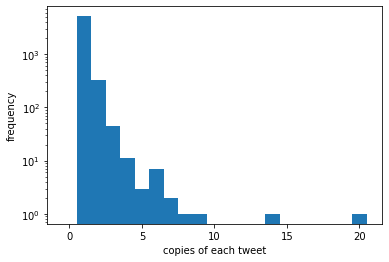

In [9]:
# number of times each tweet appears
counts = df.groupby(['tweet']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [10]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)   

In [11]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.tweet.apply(find_retweeted)
df['mentioned'] = df.tweet.apply(find_mentioned)
df['hashtags'] = df.tweet.apply(find_hashtags)

In [12]:
df.head(10)

,tweet,retweets,retweeted,mentioned,hashtags
0,Global warming report urges governments to act...,False,[],[],[]
1,Fighting poverty and global warming in Africa ...,False,[],[],[]
2,Carbon offsets: How a Vatican forest failed to...,False,[],[],[]
3,Carbon offsets: How a Vatican forest failed to...,False,[],[],[]
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False,[],[],[]
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,True,"[@sejorg, @JaymiHeimbuch]",[],[]
6,Global warming evidence all around us|A messag...,False,[],[],[]
7,Migratory Birds' New Climate Change Strategy: ...,False,[],[],[]
8,Southern Africa: Competing for Limpopo Water: ...,False,[],[],[]
9,"Global warming to impact wheat, rice productio...",False,[],[],[]


In [13]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [14]:
hashtags_list_df.head()

,hashtags
12,"[#Climate, #population]"
16,[#EarthDay]
26,[#ac]
31,[#tcot]
36,"[#tornadocot, #ocra, #sgp, #gop, #ucot, #tlot,..."


In [15]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [16]:
flattened_hashtags_df.head()

,hashtag
0,#Climate
1,#population
2,#EarthDay
3,#ac
4,#tcot


In [17]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

477

In [18]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [19]:
popular_hashtags.head()

,hashtag,counts
0,#tcot,227
1,#climate,202
2,#p2,112
3,#green,50
4,#climatechange,47


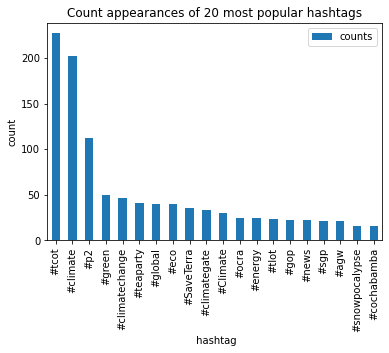

In [84]:
#plotting popular hashtags
popular_hashtags.head(20).plot(kind = 'bar', x ='hashtag', y = 'counts')
plt.xlabel(' hashtag')
plt.ylabel('count')
plt.title('Count appearances of 20 most popular hashtags')
plt.show()

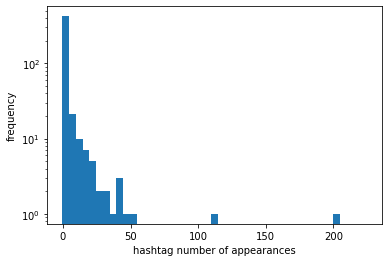

In [20]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [21]:
# take the rows from the mentioned columns where there are actually mentions
mentioned_list_df = df.loc[
                       df.mentioned.apply(
                           lambda mentioned_list: mentioned_list !=[]
                       ),['mentioned']]

In [22]:
mentioned_list_df.head()

,mentioned
24,[@GregMitch]
31,[@New_federalists]
42,[@OTOOLEFAN]
64,[@SooperMexican]
69,[@andychrism]


In [23]:
# create dataframe where each use of mentioned gets its own row
flattened_mentioned_df = pd.DataFrame(
    [mentioned for mentioned_list in mentioned_list_df.mentioned
    for mentioned in mentioned_list],
    columns=['mentioned'])

In [24]:
flattened_mentioned_df.head()

,mentioned
0,@GregMitch
1,@New_federalists
2,@OTOOLEFAN
3,@SooperMexican
4,@andychrism


In [25]:
# number of unique mentioned
flattened_mentioned_df['mentioned'].unique().size

766

In [26]:
# count of appearances of each mentioned
popular_mentioned = flattened_mentioned_df.groupby('mentioned').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [27]:
popular_mentioned.head()

,mentioned,counts
0,@NewsOnGreen,37
1,@change,33
2,@addthis,19
3,@HumanityNews,17
4,@TIME,9


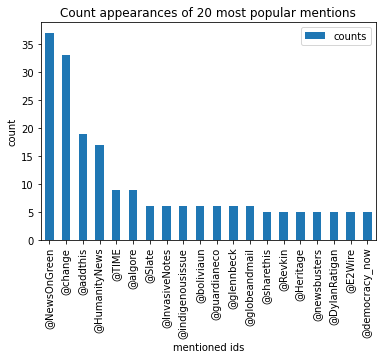

In [85]:
popular_mentioned.head(20).plot(kind = 'bar', x = 'mentioned', y = 'counts')
plt.xlabel('mentioned ids')
plt.ylabel('count')
plt.title('Count appearances of 20 most popular mentions')
plt.show()

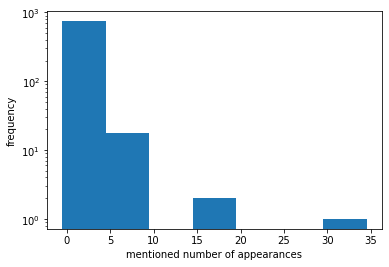

In [28]:
# number of times each hashtag appears
counts = flattened_mentioned_df.groupby(['mentioned']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('mentioned number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [29]:
# take the rows from the retweeted columns where there are actually retweets
retweeted_list_df = df.loc[
                       df.retweeted.apply(
                           lambda retweeted_list: retweeted_list !=[]
                       ),['retweeted']]

In [30]:
retweeted_list_df.head()

,retweeted
5,"[@sejorg, @JaymiHeimbuch]"
23,[@WGofNYC]
36,[@virgiltexas]
41,[@jazgar]
70,[@redostoneage]


In [31]:
# create dataframe where each use of retweeted gets its own row
flattened_retweeted_df = pd.DataFrame(
    [retweeted for retweeted_list in retweeted_list_df.retweeted
    for retweeted in retweeted_list],
    columns=['retweeted'])

In [32]:
flattened_retweeted_df.head()

,retweeted
0,@sejorg
1,@JaymiHeimbuch
2,@WGofNYC
3,@virgiltexas
4,@jazgar


In [33]:
# number of unique retweeted
flattened_retweeted_df['retweeted'].unique().size

542

In [34]:
# count of appearances of each retweeted
popular_retweeted = flattened_retweeted_df.groupby('retweeted').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [77]:
popular_retweeted.head()

,retweeted,counts
0,@Drudge_Report,19
1,@Newsweek,18
2,@redostoneage,12
3,@newtgingrich,10
4,@mattyglesias,10


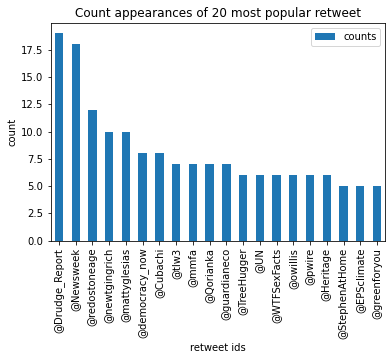

In [81]:
popular_retweeted.head(20).plot(kind = 'bar', x = 'retweeted', y = 'counts')
plt.xlabel('retweet ids')
plt.ylabel('count')
plt.title('Count appearances of 20 most popular retweet')
plt.show()

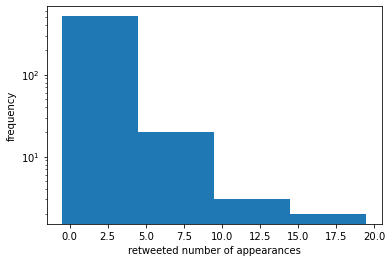

In [36]:
# number of times each retweet appears
counts = flattened_retweeted_df.groupby(['retweeted']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('retweeted number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [37]:
# take hashtags which appear at least this amount of times
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [38]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]


In [39]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [40]:
hashtag_vector_df.head()

,popular_hashtags,#fb,#SierraClub,#Green,#tcot,#tlot,#teaparty,#UN,#earthday,#global,...,#FoxNews,#Climate,#energy,#eco,#sgp,#cleantech,#climategate,#gop,#green,#du1
12,[#Climate],0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16,[#EarthDay],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,[#tcot],0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,"[#ocra, #sgp, #gop, #tlot, #p2]",0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
39,"[#tcot, #p2]",0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

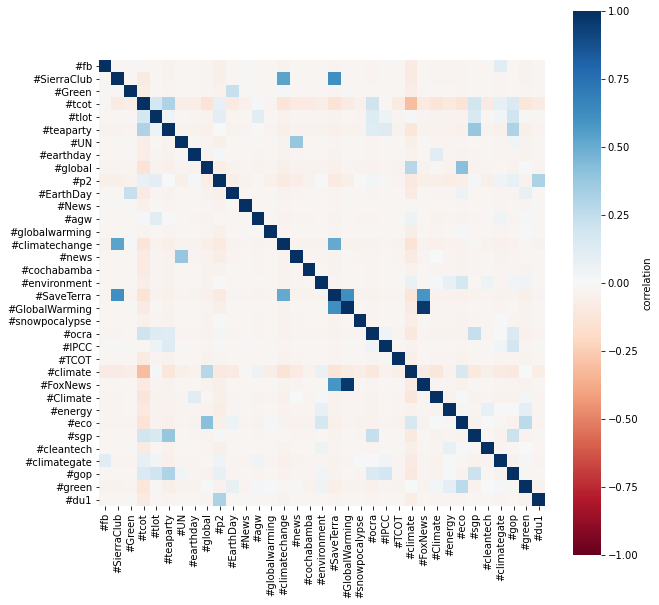

In [42]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [43]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [44]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [45]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

In [46]:
df['clean_tweet'] = df.tweet.apply(clean_tweet)

In [47]:
df.head(10)

,tweet,retweets,retweeted,mentioned,hashtags,clean_tweet
0,Global warming report urges governments to act...,False,[],[],[],global warm report urg govern act brussel belg...
1,Fighting poverty and global warming in Africa ...,False,[],[],[],fight poverti global warm africa
2,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],carbon offset vatican forest fail reduc global...
3,Carbon offsets: How a Vatican forest failed to...,False,[],[],[],carbon offset vatican forest fail reduc global...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,False,[],[],[],uruguay tool need vulner climat chang
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,True,"[@sejorg, @JaymiHeimbuch]",[],[],ocean salti show global warm intensifi water ...
6,Global warming evidence all around us|A messag...,False,[],[],[],global warm evid around us messag global warm ...
7,Migratory Birds' New Climate Change Strategy: ...,False,[],[],[],migratori bird new climat chang strategi stay ...
8,Southern Africa: Competing for Limpopo Water: ...,False,[],[],[],southern africa compet limpopo water climat ch...
9,"Global warming to impact wheat, rice productio...",False,[],[],[],global warm impact wheat rice product india lu...


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [49]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [50]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [51]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [72]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,climat,1220.2,global,666.5,global,1147.2,global,473.1,climat,422.0,global,783.0,chang,666.1,warm,167.9,climat,568.3,climat,529.9
1,chang,1184.5,warm,658.1,warm,1102.1,warm,450.7,chang,401.8,warm,764.7,climat,661.6,#climate,139.2,chang,550.5,chang,520.6
2,via,257.9,snow,160.5,scientist,150.2,believ,101.3,legisl,123.2,gore,137.1,energi,178.8,volcano,128.9,new,321.1,peopl,153.4
3,scienc,112.9,#tcot,121.6,say,87.1,california,87.1,us,105.1,snow,123.7,u,109.8,global,128.6,bill,116.9,world,151.3
4,news,79.5,like,99.0,scienc,71.7,blame,82.1,via,60.5,al,122.1,via,96.5,chang,122.0,senat,106.1,confer,110.1
5,day,77.8,blizzard,90.9,debat,66.6,law,78.6,say,55.9,great,94.1,nation,89.0,help,114.1,agenc,95.1,bill,106.4
6,earth,68.2,dc,86.5,man,61.1,report,77.8,video,55.9,cold,77.1,make,74.5,take,96.8,immigr,77.7,talk,94.8
7,trial,68.1,think,83.3,made,54.0,save,61.8,place,54.1,call,76.5,impact,67.5,climat,76.7,obama,75.6,graham,92.1
8,clinic,68.1,due,80.1,show,51.9,money,56.1,good,52.6,#tcot,75.3,report,63.4,iceland,67.1,feder,67.1,un,77.6
9,carbon,64.5,make,70.4,water,50.6,live,49.3,human,48.2,one,72.1,issu,58.8,could,64.5,via,58.6,put,68.8


In [53]:
#applying non-negative matrix factorisation (NMF) model
from sklearn.decomposition import NMF
no_topics = 10
model1 = NMF(n_components=no_topics, random_state=0, alpha=.1, l1_ratio=.5)

In [54]:
model1.fit(tf)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(alpha=0.1, l1_ratio=0.5, n_components=10, random_state=0)

In [55]:
no_top_words = 10
display_topics(model1, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,climat,10.8,global,9.3,via,7.7,snow,5.4,bill,5.2,new,6.0,#climate,4.9,peopl,3.8,say,4.4,#tcot,5.6
1,chang,9.8,warm,9.1,news,1.5,dc,1.9,senat,2.5,agenc,1.9,chang,4.6,world,3.4,report,3.3,#p,1.7
2,energi,0.3,make,0.3,humanitarian,0.6,gore,1.4,graham,1.6,obama,1.2,#global,1.0,earth,2.3,caus,2.4,#teaparty,1.0
3,scienc,0.3,could,0.2,chang,0.4,al,1.3,put,1.1,feder,1.2,#eco,0.8,confer,2.2,scientist,1.8,#gop,0.6
4,fight,0.3,scienc,0.2,india,0.3,mean,1.2,limbo,0.8,form,1.0,warm,0.7,right,1.3,us,1.0,scam,0.6
5,legisl,0.3,think,0.2,com,0.2,jr,1.0,exit,0.8,studi,0.7,us,0.4,bolivia,1.0,govern,0.8,dc,0.6
6,u,0.3,stop,0.2,un,0.1,storm,1.0,climat,0.7,administr,0.7,fact,0.3,day,1.0,may,0.8,gore,0.5
7,un,0.3,effect,0.2,environ,0.1,cold,0.9,compromis,0.7,propos,0.6,nasa,0.3,mother,1.0,u,0.4,#ocra,0.5
8,get,0.2,volcano,0.2,mean,0.1,washington,0.9,prepar,0.7,york,0.6,#p,0.3,indigen,0.4,carbon,0.3,al,0.5
9,action,0.2,believ,0.2,impact,0.1,ago,0.9,immigr,0.6,report,0.5,thought,0.3,cochabamba,0.3,china,0.3,#tlot,0.5


# Conclusion 
Using two different models we can see that the final table is different is different for the two since different models have different strengths.